In [359]:
from loading_data import queryDB
import pandas as pd

In [360]:
import json
import numpy as np
import copy
import os

config_path = 'config.json'

with open(config_path) as config_buffer:
   config = json.loads(config_buffer.read())

model_path = config['model_weights']
num_concepts = len(config['conceptids'])
class_map_file = config['class_map']
concepts = config['conceptids']
classmap = pd.read_csv(class_map_file, header=None).to_dict()[0]

In [809]:
counts = queryDB('''
    select videoid, count(*) as total, 
        sum(case when conceptid=1629 then 1 else 0 end) As count1629, 
        sum(case when conceptid=1210 then 1 else 0 end) As count1210, 
        sum(case when conceptid=236 then 1 else 0 end) As count236, 
        sum(case when conceptid=383 then 1 else 0 end) As count383, 
        sum(case when conceptid=1133 then 1 else 0 end) As count1133 
    from annotations where userid != 17 and conceptid in (1629, 1210, 236, 383, 1133)
    group by videoid 
    order by total desc;
       ''')

counts.head(20)
       

,videoid,total,count1629,count1210,count236,count383,count1133
0,37,3916,0,4,2885,1024,3
1,39,2186,0,0,1077,1108,1
2,38,1032,0,0,660,371,1
3,34,941,0,2,860,78,1
4,24,459,0,0,459,0,0
5,32,420,0,61,80,273,6
6,33,340,0,16,208,109,7
7,86,331,0,40,143,148,0
8,98,309,0,29,181,97,2
9,35,288,0,9,221,58,0


In [3]:
queryDB("select * from videos where filename='DocRicketts-0701_20141216T212020Z_00-48-12-26TC_h264.mp4'")


,id,filename,gpsstart,gpsstop,starttime,endtime,startdepth,enddepth,description
0,8,DocRicketts-0701_20141216T212020Z_00-48-12-26T...,"(36.798367,-122.108671)","(36.798215,-122.108195)",2014-12-16 21:20:20,2014-12-16 21:36:20,217,149,


In [868]:
annotations = queryDB('select * from annotations where videoid=86 and userid!=17')


In [869]:
annotations

,id,videoid,userid,conceptid,timeinvideo,x1,y1,x2,y2,videowidth,videoheight,dateannotated,image,imagewithbox,comment,unsure,originalid,framenum
0,4972131,86,15,383,7.399145,663.000000,78.000000,1008.000000,271.000000,1600.0,900.0,2019-02-28,1551325967699.png,1551325967699_box.png,,False,4972131,None
1,4972162,86,15,383,7.399145,164.000000,35.000000,542.000000,246.000000,1600.0,900.0,2019-02-28,1551325978189.png,1551325978189_box.png,,False,4972162,None
2,4972261,86,15,383,13.815457,281.000000,162.000000,659.000000,373.000000,1600.0,900.0,2019-02-28,1551326013658.png,1551326013658_box.png,,False,4972261,None
3,4972323,86,15,383,13.815457,126.000000,5.000000,422.000000,192.000000,1600.0,900.0,2019-02-28,1551326023375.png,1551326023375_box.png,,False,4972323,None
4,4972101,86,15,383,5.742937,592.000000,354.000000,1024.000000,599.000000,1600.0,900.0,2019-02-28,1551325952284.png,1551325952284_box.png,,False,4972101,None
5,4972506,86,15,383,16.922915,952.000000,127.000000,1466.000000,435.000000,1600.0,900.0,2019-02-28,1551326057354.png,1551326057354_box.png,,False,4972506,None
6,4972607,86,15,383,20.703748,17.000000,223.000000,406.000000,457.000000,1600.0,900.0,2019-02-28,1551326079455.png,1551326079455_box.png,,False,4972607,None
7,4972728,86,15,383,22.220643,218.000000,256.000000,596.000000,501.000000,1600.0,900.0,2019-02-28,1551326101177.png,1551326101177_box.png,,False,4972728,None
8,4972856,86,15,3100,24.422518,372.000000,207.000000,498.000000,313.000000,1600.0,900.0,2019-02-28,1551326278836.png,1551326278836_box.png,,False,4972856,None
9,4972973,86,15,1210,29.267475,566.999985,400.000031,761.999985,535.000031,1600.0,900.0,2019-02-28,1551326354918.png,1551326354918_box.png,,True,4972973,None


In [870]:
# Get the IOU value for two different annotations
def compute_overlap(annotationA, annotationB):
    # if there is no overlap in x dimension
    if ((annotationB.x2 - annotationA.x1) < 0) or ((annotationA.x2 - annotationB.x1) < 0):
        return 0
    # if there is no overlap in y dimension
    if ((annotationB.y2 - annotationA.y1) < 0) or ((annotationA.y2 - annotationB.y1) < 0):
        return 0
    
    areaA = (annotationA.x2-annotationA.x1) * (annotationA.y2-annotationA.y1)
    areaB = (annotationB.x2-annotationB.x1) * (annotationB.y2-annotationB.y1)

    width = min(annotationA.x2,annotationB.x2) - min(annotationA.x1,annotationB.x1)
    height = min(annotationA.y2,annotationB.y2) - min(annotationA.y1,annotationB.y1)
    
    area_intersect = height * width
    iou = area_intersect / (areaA + areaB - area_intersect)
    
    return iou

In [871]:
a = annotations.iloc[0]
a.x1 = -1
a.x2 = 0
if compute_overlap(a,annotations.iloc[0]) != 0:
    print("ERROR")
    
a = annotations.iloc[0]
a.x1 = 0
a.x2 = 1000
a.y1 = 0
a.y2 = 1000
b = annotations.iloc[0]
b.x1 = 0
b.x2 = 1000
b.y1 = 0
b.y2 = 500

if compute_overlap(a,b) != .5:
    print("ERROR")
    
a = annotations.iloc[0]
a.x1 = 575.006
a.y1 = 49.0063
a.x2 = 699
a.y2 = 155.994
b = annotations.iloc[0]
b.x1 = 462
b.y1 = 398
b.x2 = 488
b.y2 = 426

compute_overlap(a,b)

/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0

In [874]:
# GET RESULTS, RENAME ID COLUMNS in RESULTS

results = pd.read_csv('results86.csv')
results.columns = ['id', 'x1', 'y1', 'x2', 'y2', 'label', 'confidence', 'objectid',
       'frame_num']
results.head()


,id,x1,y1,x2,y2,label,confidence,objectid,frame_num
0,0,239.198868,157.985123,282.914032,215.522751,2.0,0.105341,3ee0e49e-71b7-45a3-8355-02c6fb58b4e6,50
1,1,239.000000,158.000000,283.000000,216.000000,NaN,NaN,3ee0e49e-71b7-45a3-8355-02c6fb58b4e6,51
2,0,315.964722,87.804733,371.596863,126.365669,2.0,0.102929,7f1a8b0f-a48a-445d-915b-00a71ffc6650,150
3,1,316.000000,88.000000,372.000000,127.000000,NaN,NaN,7f1a8b0f-a48a-445d-915b-00a71ffc6650,151
4,0,473.164886,327.711243,501.897552,354.338989,2.0,0.111957,f9ee9dd2-9d52-4dfa-b215-44e5f56de29c,150


In [875]:
len(results.objectid.value_counts())

2372

In [876]:
len(annotations)

426

In [877]:
# predicted_frames = results[results.confidence.notnull()]
# predicted_frames.head()

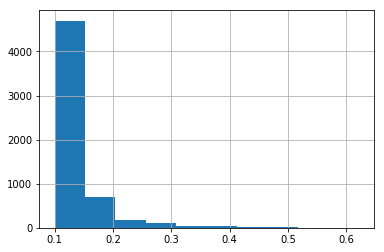

In [878]:
%matplotlib inline
results.confidence.hist()

In [879]:
# Limit Results based on confidence
# Mutates Results
max_conf = pd.DataFrame(results.groupby('objectid').confidence.max())
above_thresh = max_conf[max_conf.confidence > 0.30].index
results = results[[(obj in above_thresh) for obj in results.objectid]]

In [881]:
len(results.objectid.value_counts())

98

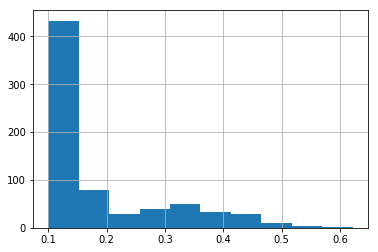

In [880]:
%matplotlib inline
results.confidence.hist()

In [882]:
# Add the majority concept id to all frames
label = None
objects = results.groupby(['objectid'])
for oid, result in objects:
    scores = {}
    for k , label in result.groupby(['label']):
        scores[k] = label.confidence.mean() # SHOULD THIS BE A WEIGHTED MAX?
    idmax = max(scores.keys(), key=(lambda k: scores[k]))
    results.loc[results.objectid == oid,'label'] = idmax
results['label'] = results['label'].apply(lambda x: concepts[int(x)])
results['conceptid'] = results['label']

In [883]:
# test counts

grouped = results.groupby(['objectid']).label.mean().reset_index()
counts = grouped.groupby('label').count()
counts.columns = ['pred_num']
groundtruth_counts = pd.DataFrame(annotations.groupby('conceptid').id.count())
groundtruth_counts.columns = ['true_num']
df = pd.concat((counts, groundtruth_counts), axis=1, join='outer').fillna(0)
df['count_error'] = (df.true_num - df.pred_num).abs() / df.true_num
concept_counts = df
concept_counts


,pred_num,true_num,count_error
236,52.0,143,0.636364
237,0.0,10,1.000000
383,43.0,148,0.709459
812,0.0,1,1.000000
1019,0.0,6,1.000000
1034,0.0,24,1.000000
1210,3.0,40,0.925000
1399,0.0,2,1.000000
3100,0.0,51,1.000000
3386,0.0,1,1.000000


In [884]:
# Make fps an Integer
annotations['frame_num'] = np.rint(annotations['timeinvideo'] * fps)
annotations.head()

,id,videoid,userid,conceptid,timeinvideo,x1,y1,x2,y2,videowidth,videoheight,dateannotated,image,imagewithbox,comment,unsure,originalid,framenum,frame_num
0,4972131,86,15,383,7.399145,663.0,78.0,1008.0,271.0,1600.0,900.0,2019-02-28,1551325967699.png,1551325967699_box.png,,False,4972131,None,222.0
1,4972162,86,15,383,7.399145,164.0,35.0,542.0,246.0,1600.0,900.0,2019-02-28,1551325978189.png,1551325978189_box.png,,False,4972162,None,222.0
2,4972261,86,15,383,13.815457,281.0,162.0,659.0,373.0,1600.0,900.0,2019-02-28,1551326013658.png,1551326013658_box.png,,False,4972261,None,414.0
3,4972323,86,15,383,13.815457,126.0,5.0,422.0,192.0,1600.0,900.0,2019-02-28,1551326023375.png,1551326023375_box.png,,False,4972323,None,414.0
4,4972101,86,15,383,5.742937,592.0,354.0,1024.0,599.0,1600.0,900.0,2019-02-28,1551325952284.png,1551325952284_box.png,,False,4972101,None,172.0


In [885]:
def resize(row):
    new_width = 640
    new_height = 480
    x_ratio = (row.videowidth / new_width)
    y_ratio = (row.videoheight / new_height)
    row.videowidth = new_width
    row.videoheight = new_height
    row.x1 = row.x1 / x_ratio
    row.x2 = row.x2 / x_ratio
    row.y1 = row.y1 / y_ratio
    row.y2 = row.y2 / y_ratio
    return row

In [886]:
# RESIZE THE ANNOTATIONS
test_annotations = annotations.apply(resize, axis=1)

In [887]:
# Important to convert frame number to int
test_annotations.frame_num = test_annotations.frame_num.astype(int)

In [888]:
# pred_frames = results.frame_num.unique()
# test_frames = annotations.frame_num.unique()
# test_frames[[(val in pred_frames) for val in test_frames]]
# test_frames

In [889]:
test_annotations.head()

,id,videoid,userid,conceptid,timeinvideo,x1,y1,x2,y2,videowidth,videoheight,dateannotated,image,imagewithbox,comment,unsure,originalid,framenum,frame_num
0,4972131,86,15,383,7.399145,265.2,41.600000,403.2,144.533333,640,480,2019-02-28,1551325967699.png,1551325967699_box.png,,False,4972131,None,222
1,4972162,86,15,383,7.399145,65.6,18.666667,216.8,131.200000,640,480,2019-02-28,1551325978189.png,1551325978189_box.png,,False,4972162,None,222
2,4972261,86,15,383,13.815457,112.4,86.400000,263.6,198.933333,640,480,2019-02-28,1551326013658.png,1551326013658_box.png,,False,4972261,None,414
3,4972323,86,15,383,13.815457,50.4,2.666667,168.8,102.400000,640,480,2019-02-28,1551326023375.png,1551326023375_box.png,,False,4972323,None,414
4,4972101,86,15,383,5.742937,236.8,188.800000,409.6,319.466667,640,480,2019-02-28,1551325952284.png,1551325952284_box.png,,False,4972101,None,172


In [890]:
def score_predictions(validation,predictions,iou_thresh, concepts, fps):
    
    detected_objects = []
    obj_map = predictions.groupby('objectid', sort=False).conceptid.max()
    
    # group predictions by video frames
    predictions = predictions.groupby('frame_num', sort=False)
    predictions = [df for _, df in predictions]
    
    # mapping frames to predictions index
    frame_data = {}
    for i, group in enumerate(predictions):
        frame_num = group.iloc[0]['frame_num']
        frame_data[frame_num] = i
    
    # group validation annotations by frames
    validation = validation.groupby('frame_num', sort=False)
    validation = [df for _, df in validation]
    
    # initialize counters for each concept
    true_positives = dict(zip(concepts,[0] * len(concepts)))
    false_positives = dict(zip(concepts,[0] * len(concepts)))
    false_negatives = dict(zip(concepts,[0] * len(concepts)))
    
    # get true and false positives for each frame of validation data
    for group in validation:
        frame_num = group.iloc[0]['frame_num']
    
        #get corresponding predictions for this set
        try:
            predicted = predictions[frame_data[frame_num]]
        except:
            print("prediction not found")
            # FALSE NEGATIVES? # Does this make sense?
#             for index, truth in group.iterrows():
#                 if truth.conceptid in concepts:
#                     false_negatives[truth.conceptid] += 1
            continue
            
        #go through predictions and identify false positives/false negatives/ true_positives
        detected_predictions = []
        detected_truths = dict(zip(concepts, [0] * len(concepts)))
        for index, truth in group.iterrows():
            for index, prediction in predicted.iterrows():
                
                if (prediction.objectid in detected_objects
                    or prediction.objectid in detected_predictions 
                    or compute_overlap(truth, prediction) < iou_thresh
                    or prediction.conceptid != truth.conceptid):
                    pass
                else:
                    detected_objects.append(prediction.objectid)
                    detected_predictions.append(prediction.objectid)
                    true_positives[prediction.conceptid] += 1
                    detected_truths[prediction.conceptid] += 1
                    
        # count number of annotations that were correct, wrong, and missed
        # validation[0].conceptid.value_counts()[236]
        counts = group.conceptid.value_counts()
        for id in concepts:
            count = counts[id] if id in counts.index else 0
            false_negatives[id] += count - detected_truths[id]
    
    # False Positives (No ground truth prediction at any frame for that object)
#     print(len(set(obj_map.index)), len(set(detected_predictions)))
#     print(detected_predictions)
    for obj in (set(obj_map.index) - set(detected_objects)):
        concept = obj_map[obj]
        false_positives[concept] += 1
    
    metrics = pd.DataFrame()
    for concept in concepts:
        TP = true_positives[concept]
        FP = false_positives[concept]
        FN = false_negatives[concept]
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1 = (2*recall*precision / (precision+recall)) if (precision+recall) != 0 else 0
        metrics = metrics.append([[concept, TP, FP, FN, precision, recall, f1]])
    metrics.columns = ['conceptid', 'TP', 'FP', 'FN', 'Precision', 'Recall', 'F1']
    return metrics
    
#     f1 = dict(zip(concepts,[0] * len(concepts)))
#     for id in concepts:
#         try:
#             recall = true_positives[id] / (true_positives[id] + false_negatives[id])
#             precision = true_positives[id] / (true_positives[id] + false_positives[id])
#             f1[id] = 2*recall*precision / (precision+recall)
#         except:
#             f1[id] = 0
#     return f1

In [891]:
fps = 29.97002997002997
metrics = score_predictions(test_annotations, results, 0.10, concepts, fps)

prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction not found
prediction no

In [892]:
metrics.set_index('conceptid')

,TP,FP,FN,Precision,Recall,F1
conceptid,,,,,,
1629,0,0,0,0.000000,0.000000,0.000000
1210,1,2,12,0.333333,0.076923,0.125000
236,25,27,33,0.480769,0.431034,0.454545
383,39,4,22,0.906977,0.639344,0.750000
1133,0,0,0,0.000000,0.000000,0.000000


In [893]:
metrics.set_index('conceptid').join(concept_counts)

,TP,FP,FN,Precision,Recall,F1,pred_num,true_num,count_error
conceptid,,,,,,,,,
1629,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN
1210,1,2,12,0.333333,0.076923,0.125000,3.0,40.0,0.925000
236,25,27,33,0.480769,0.431034,0.454545,52.0,143.0,0.636364
383,39,4,22,0.906977,0.639344,0.750000,43.0,148.0,0.709459
1133,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
# Aim for 90% recall, at the sacrifice of 50% precision

In [ ]:
# make a threshold for the bounding box size of the annotation
# for the maximum confidence annotation in each object
# maybe 10x10 pixels



In [755]:
pd.DataFrame(results.groupby('objectid').conceptid.value_counts()).describe()

,conceptid
count,216.000000
mean,738.055556
std,1480.265236
min,3.000000
25%,86.000000
50%,141.000000
75%,773.250000
max,10120.000000


In [675]:
obj_map = results.groupby('objectid', sort=False).conceptid.max()

In [728]:
validation = annotations.groupby('frame_num', sort=False)
validation = [df for _, df in validation]